**LeNet**

In [0]:
import keras #匯入Keras
from keras.datasets import mnist #Keras已內建MNIST資料集
from keras.utils import np_utils #Keras矩陣處理元件
from keras.models import Sequential #Keras模型結構
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten #Keras神經網路所需要的函式，全連接層、激勵函數、卷積層、池化層、平坦層
from keras.optimizers import Adam #優化器(反向傳播、梯度下降)使用Adam
import matplotlib.pyplot as plt #圖像化工具

**Dowload Dataset**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

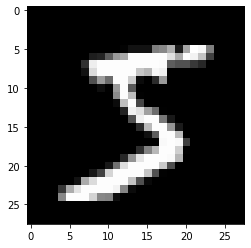

In [3]:
plt.imshow(X_train[0], cmap ='gray')

**Check X_train shape**

In [4]:
X_train.shape[0]

60000

**將圖片矩陣轉成(28, 28, 1)**

In [0]:
X_train = X_train.reshape(-1,28, 28, 1)
X_test = X_test.reshape(-1,28, 28, 1)
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
y_train.shape

(60000,)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28, 1)

**One Hot Encoding**

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**建立模型**

In [10]:
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5, 5), padding = 'valid', strides=(1,1), input_shape = (28, 28, 1)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters = 16, kernel_size = (5, 5), strides=(1,1)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))

model.add(Dense(10))
model.add(Activation('softmax'))

**訓練模型並儲存訓練後權重**

In [11]:
model.summary()
# https://keras.io/zh/optimizers/
model.compile(optimizer = Adam(lr = 0.001, 
                               beta_1 = 0.9, 
                               beta_2 = 0.999, 
                               epsilon = 1e-08), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

History = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test, y_test))

from keras.models import load_model
model.save('Lenet.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

**訓練結果accuracy和Loss圖像化輸出**

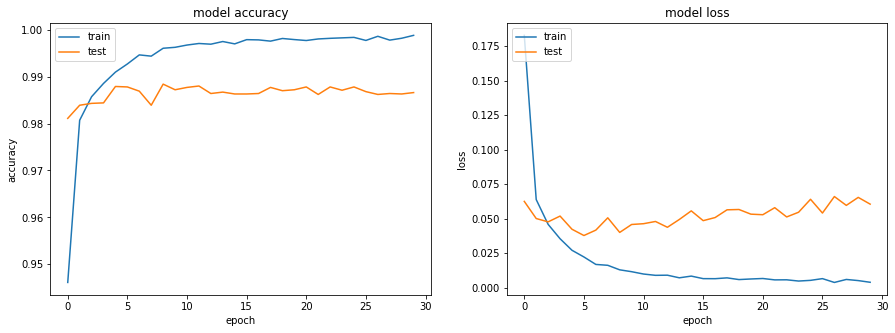

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

**載入權重預測結果**

In [13]:
model = load_model("Lenet.h5")
y_pred = model.predict_classes(X_test, 32, verbose = 1)
y_pred

10000/10000 [==============================] - 0s 42us/step


array([7, 2, 1, ..., 4, 5, 6])

In [0]:
X_test = X_test.reshape(10000, 28, 28)

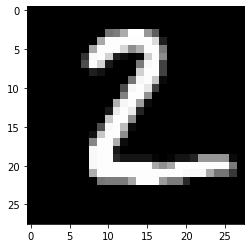

In [15]:
plt.imshow(X_test[1], cmap ='gray')